In [18]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [19]:
# Read the data
data = pd.read_excel('Monthly_CO2_Concentrations.xlsx', converters={'Year': np.int32, 'Month': np.int32})

# Create a datetime index (year-month)
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0' + x if len(x) == 1 else x)

# Drop the year and month columns
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


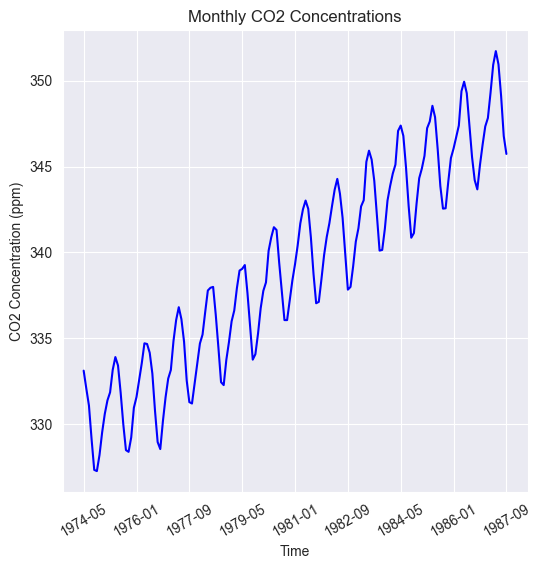

In [20]:
# Clear null data
data = data.loc[(~pd.isnull(data['CO2'])) &\
               (~pd.isnull(data['Year'])) &\
               (~pd.isnull(data['Month']))]

# Sort the data by year and month
data.sort_values(['Year', 'Month'], inplace=True)

# Plot the data
plt.figure(figsize=(6, 6))
data.CO2.plot(color='b')
plt.title('Monthly CO2 Concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks(rotation=30)
plt.show()

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


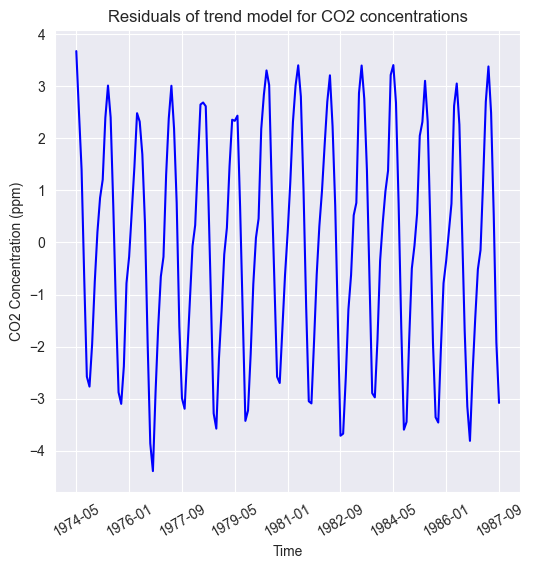

In [21]:
# Create a trend model
trend_model  = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape(-1, 1), data.CO2)

# Print the trend model coefficients
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

# Get residuals
residuals = np.array(data.CO2) - trend_model.predict(np.arange(data.shape[0]).reshape(-1, 1))

# Plot the residuals
plt.figure(figsize=(6, 6))
pd.Series(residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks(rotation=30)
plt.show()

# Los residuos obtenidos a partir del modelo de línea de tendencia se muestran en la siguiente figura y parecen tener un comportamiento estacional

In [22]:
### Seasonality ###
# Create a seasonal model
data['Residuals'] = residuals
data['Quarter'] = data['Month'].map(lambda x: 'Q1' if x <= 3 else 'Q2' if x <= 6 else 'Q3' if x <= 9 else 'Q4')

# Get the mean and standard deviation of the residuals for each quarter
seasonal_sub_series_data = data.groupby(['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

# Create row indices for the seasonal sub-series using the year and quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


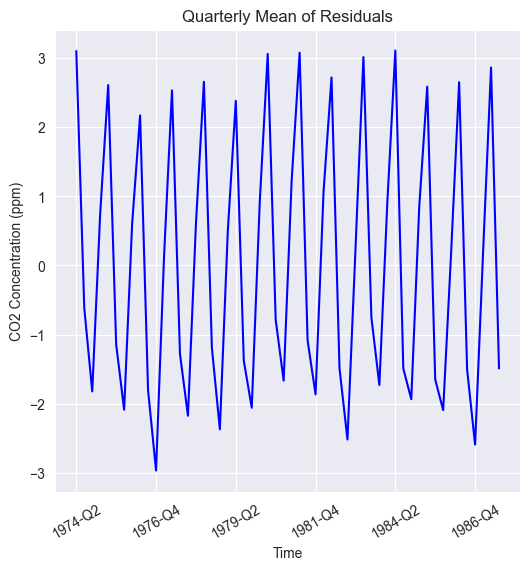

In [23]:
# Plot the quarterly mean of the residuals
plt.figure(figsize=(6, 6))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks(rotation=30)
plt.show()

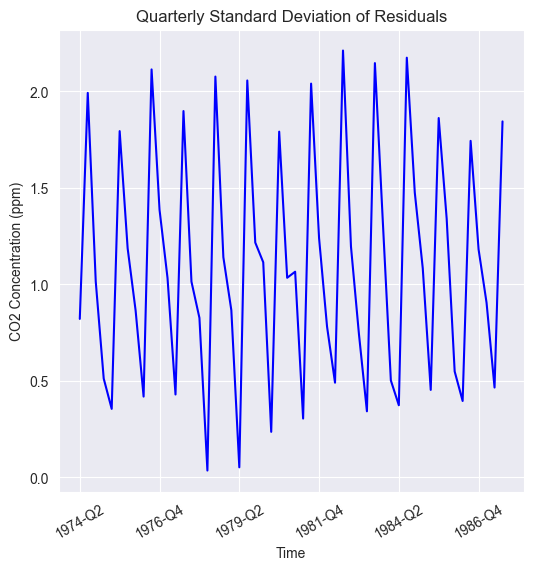

In [24]:
# Plot the quarterly standard deviation of the residuals
plt.figure(figsize=(6, 6))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks(rotation=30)
plt.show()

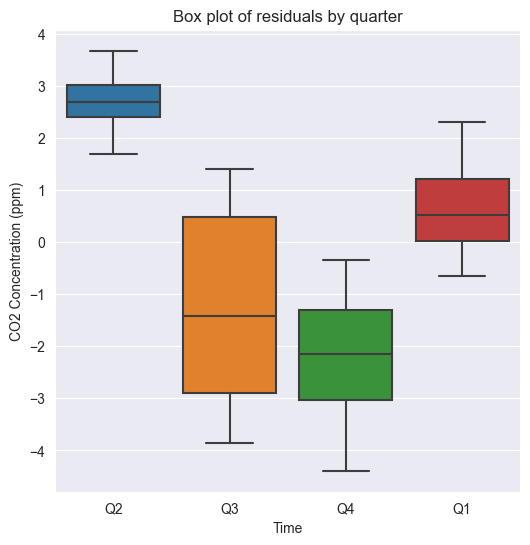

In [25]:
# Multiple box plots to visualize the central tendency and dispersion of the seasonal sub series
plt.figure(figsize=(6, 6))
g = sns.boxplot(x='Quarter', y='Residuals', data=data)
g.set_title('Box plot of residuals by quarter')
g.set_xlabel('Time')
g.set_ylabel('CO2 Concentration (ppm)')
plt.show()